1.

Tolerancia: 0.1
Aproximación: 0.7071430457793603
Iteraciones: 3
Error relativo: 5.128587898980941e-05
Error porcentual: 0.005128587898980941%



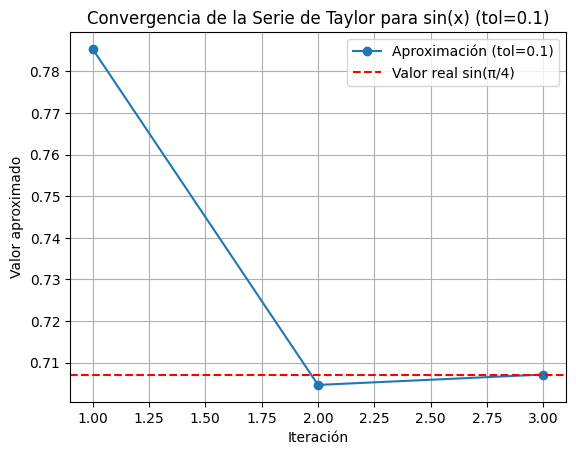

Tolerancia: 1e-05
Aproximación: 0.7071067811796194
Iteraciones: 6
Error relativo: 9.797690960678494e-12
Error porcentual: 9.797690960678495e-10%



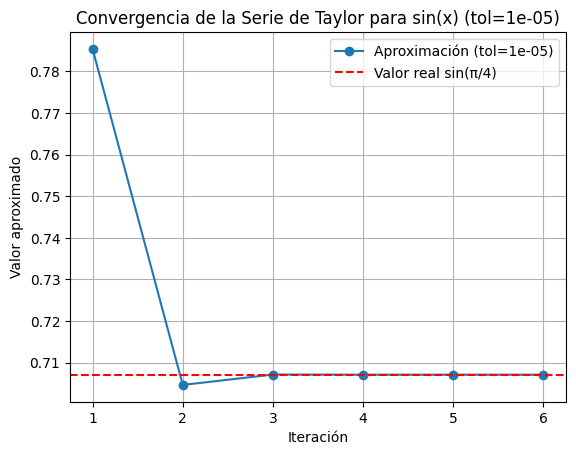

Tolerancia: 1e-10
Aproximación: 0.7071067811865475
Iteraciones: 8
Error relativo: 0.0
Error porcentual: 0.0%



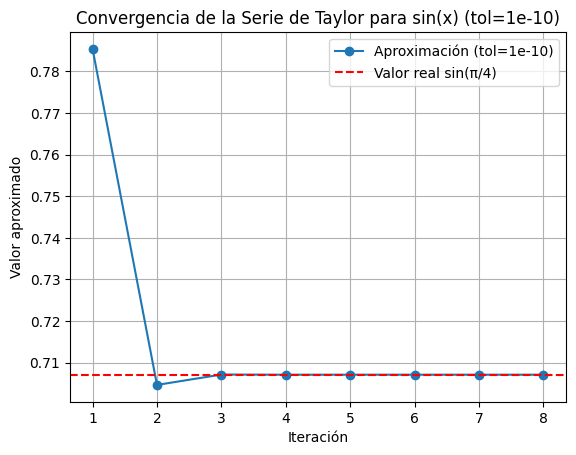

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def seno(tolerancia, max_iteraciones, x):
    seno = 0
    n = 0
    lista1 = []
    termino_anterior = 0
    while n < max_iteraciones:
        termino = ((-1)**n * x**(2*n+1)) / math.factorial(2*n+1)
        seno += termino
        lista1.append(seno)
        if abs(termino - termino_anterior) < tolerancia:
            return seno, n+1, lista1
        termino_anterior = termino
        n += 1
    print("máximo de iteraciones alcanzadas sin convergencia")
    return seno, n, lista1

tolerancias = [1e-1, 1e-5, 1e-10]
x = np.pi / 4
valor_real = np.sin(x)
max_iteraciones = 50

for tol in tolerancias:
    aproximado, iteraciones, lista1 = seno(tol, max_iteraciones, x)
    error_relativo = abs((valor_real - aproximado) / valor_real)
    error_porcentual = error_relativo * 100

    print(f"Tolerancia: {tol}")
    print(f"Aproximación: {aproximado}")
    print(f"Iteraciones: {iteraciones}")
    print(f"Error relativo: {error_relativo}")
    print(f"Error porcentual: {error_porcentual}%\n")

    plt.figure()
    plt.plot(range(1, len(lista1)+1), lista1, marker='o', label=f'Aproximación (tol={tol})')
    plt.axhline(y=valor_real, color='r', linestyle='--', label='Valor real sin(π/4)')
    plt.title(f'Convergencia de la Serie de Taylor para sin(x) (tol={tol})')
    plt.xlabel('Iteración')
    plt.ylabel('Valor aproximado')
    plt.legend()
    plt.grid(True)
    plt.show()


2.

N Términos | Aproximación | Error Relativo | Error Porcentual (%)
        1 |   1.00000000 |     0.18350342 |          18.350342
        6 |   1.22497559 |     0.00018838 |           0.018838
       11 |   1.22474215 |     0.00000222 |           0.000222
       16 |   1.22474492 |     0.00000004 |           0.000004
       21 |   1.22474487 |     0.00000000 |           0.000000
       26 |   1.22474487 |     0.00000000 |           0.000000
       31 |   1.22474487 |     0.00000000 |           0.000000
       36 |   1.22474487 |     0.00000000 |           0.000000
       41 |   1.22474487 |     0.00000000 |           0.000000
       46 |   1.22474487 |     0.00000000 |           0.000000


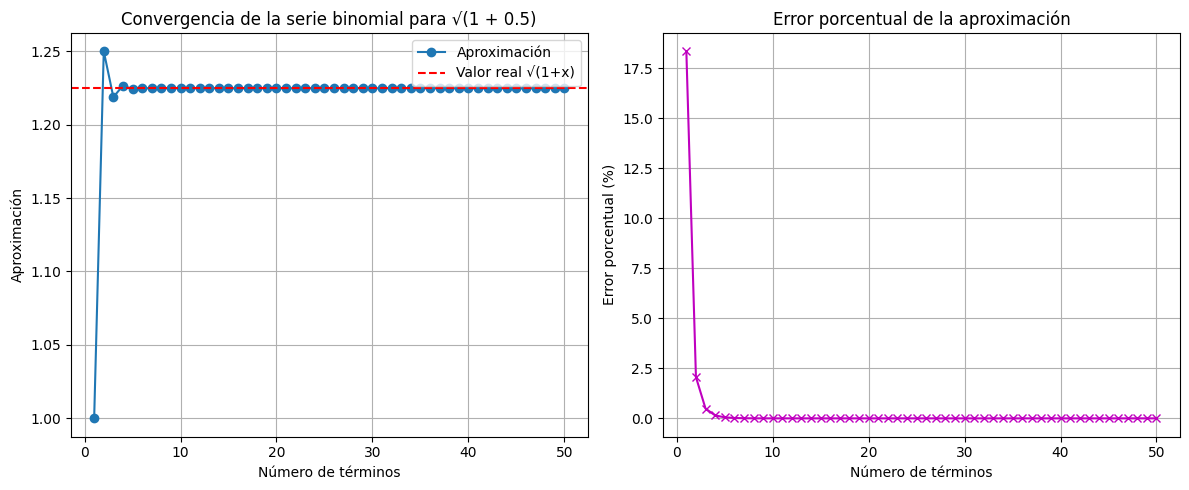


Tolerancia | Términos necesarios para convergencia
1.0e-01      | 4
1.0e-02      | 6
1.0e-03      | 8
1.0e-04      | 10
1.0e-05      | 13
1.0e-06      | 16
1.0e-07      | 19


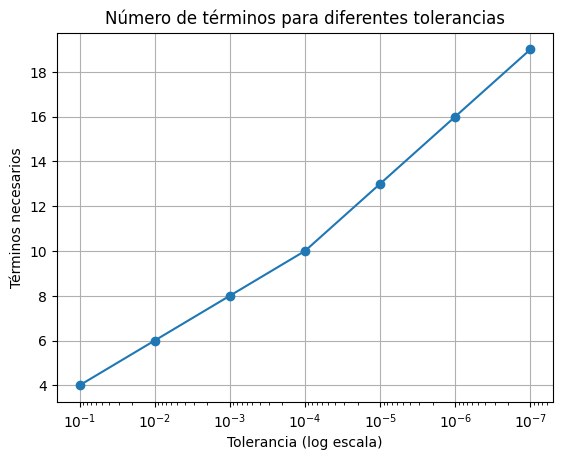

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

def coef_binomial_generalizado(alpha, n):
    """Calcula el coeficiente binomial generalizado (alpha n)"""
    coef = 1
    for k in range(n):
        coef *= (alpha - k)
    return coef / factorial(n)

def raiz_serie_binomial(x, alpha, tolerancia, max_iteraciones):
    suma_aprox = 0
    lista_aprox = []
    n = 0
    termino_anterior = 0

    while n <= max_iteraciones:
        termino = coef_binomial_generalizado(alpha, n) * (x ** n)
        suma_aprox += termino
        lista_aprox.append(suma_aprox)

        if n > 0 and abs(termino - termino_anterior) < tolerancia:
            return suma_aprox, n + 1, lista_aprox

        termino_anterior = termino
        n += 1

    print("Máximo de iteraciones alcanzado sin convergencia")
    return suma_aprox, n, lista_aprox

# Parámetros
alpha = 0.5
x = 0.5
valor_real = np.sqrt(1 + x)
max_iter = 50

aprox_lista = []
errores_relativos = []
errores_porcentuales = []
terminos = list(range(1, max_iter + 1))

for n in terminos:
    suma = 0
    for k in range(n):
        suma += coef_binomial_generalizado(alpha, k) * (x ** k)
    aprox_lista.append(suma)
    error_rel = abs(valor_real - suma) / abs(valor_real)
    errores_relativos.append(error_rel)
    errores_porcentuales.append(error_rel * 100)


print("N Términos | Aproximación | Error Relativo | Error Porcentual (%)")
for i in range(0, max_iter, 5):
    print(f"{i+1:9d} | {aprox_lista[i]:12.8f} | {errores_relativos[i]:14.8f} | {errores_porcentuales[i]:18.6f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(terminos, aprox_lista, marker='o', label='Aproximación')
plt.axhline(y=valor_real, color='r', linestyle='--', label='Valor real √(1+x)')
plt.xlabel('Número de términos')
plt.ylabel('Aproximación')
plt.title(f'Convergencia de la serie binomial para √(1 + {x})')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(terminos, errores_porcentuales, marker='x', color='m')
plt.xlabel('Número de términos')
plt.ylabel('Error porcentual (%)')
plt.title('Error porcentual de la aproximación')
plt.grid(True)

plt.tight_layout()
plt.show()


tolerancias = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
terminos_necesarios = []

for tol in tolerancias:
    aprox, n_t, lista = raiz_serie_binomial(x, alpha, tol, max_iter)
    terminos_necesarios.append(n_t)

print("\nTolerancia | Términos necesarios para convergencia")
for tol, t in zip(tolerancias, terminos_necesarios):
    print(f"{tol:.1e}      | {t}")


plt.figure()
plt.plot(tolerancias, terminos_necesarios, marker='o')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('Tolerancia (log escala)')
plt.ylabel('Términos necesarios')
plt.title('Número de términos para diferentes tolerancias')
plt.grid(True)
plt.show()
